In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/av-jobathon-jun22/train_wn75k28.csv
/kaggle/input/av-jobathon-jun22/sample_submission_2zvVjBu.csv
/kaggle/input/av-jobathon-jun22/test_Wf7sxXF.csv


In [95]:
df = pd.read_csv('../input/av-jobathon-jun22/train_wn75k28.csv')
df_test = pd.read_csv('../input/av-jobathon-jun22/test_Wf7sxXF.csv')


In [97]:
df_test

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,2022-03-30,16,12,NaN,NaN,0,0,0,0,0,1,1,0,0,0,0,0
13180,52342,2022-03-30,12,8,NaN,2022-03-19,1,0,0,0,0,1,0,0,0,0,0,0
13181,52343,2022-03-30,14,14,3.0,2021-08-15,0,0,1,0,0,0,1,0,0,0,0,0
13182,52344,2022-03-30,14,10,NaN,NaN,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
df.describe

**Replace NaN with 0 within existing dataset**

In [98]:
# df['products_purchased'].fillna(0, inplace = True)
df_test['products_purchased'].fillna(0, inplace = True)

**Delete rows with NaN**

In [84]:
# df = df.dropna(axis=0, subset=['signup_date'])
# df_test = df_test.dropna(axis=0, subset=['signup_date'])

In [54]:
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,0.0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [6]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [55]:
df['signup_date'].value_counts()

2021-07-18    45
2021-08-03    38
2021-01-28    38
2021-09-10    38
2021-09-20    38
              ..
2018-11-16     1
2018-05-20     1
2017-12-08     1
2017-10-12     1
2017-10-19     1
Name: signup_date, Length: 1800, dtype: int64

In [99]:
# df['created_at_day'] = (pd.DatetimeIndex(df['created_at']).day)
# df['created_at_month'] = (pd.DatetimeIndex(df['created_at']).month)
# df['created_at_year'] = (pd.DatetimeIndex(df['created_at']).year)
# df['signup_date_day'] = (pd.DatetimeIndex(df['signup_date']).day)
# df['signup_date_month'] = (pd.DatetimeIndex(df['signup_date']).month)
# df['signup_date_year'] = (pd.DatetimeIndex(df['signup_date']).year)
# df
df_test['created_at_day'] = (pd.DatetimeIndex(df_test['created_at']).day)
df_test['created_at_month'] = (pd.DatetimeIndex(df_test['created_at']).month)
df_test['created_at_year'] = (pd.DatetimeIndex(df_test['created_at']).year)
df_test['signup_date_day'] = (pd.DatetimeIndex(df_test['signup_date']).day)
df_test['signup_date_month'] = (pd.DatetimeIndex(df_test['signup_date']).month)
df_test['signup_date_year'] = (pd.DatetimeIndex(df_test['signup_date']).year)

In [100]:
# df['created_at_day'].fillna(df['created_at_day'].median(), inplace = True)
# df['created_at_month'].fillna(df['created_at_month'].median(), inplace = True)
# df['created_at_year'].fillna(df['created_at_year'].median(), inplace = True)
# df['signup_date_day'].fillna(df['signup_date_day'].median(), inplace = True)
# df['signup_date_month'].fillna(df['signup_date_month'].median(), inplace = True)
# df['signup_date_year'].fillna(df['signup_date_year'].median(), inplace = True)
# df

df_test['created_at_day'].fillna(df_test['created_at_day'].median(), inplace = True)
df_test['created_at_month'].fillna(df_test['created_at_month'].median(), inplace = True)
df_test['created_at_year'].fillna(df_test['created_at_year'].median(), inplace = True)
df_test['signup_date_day'].fillna(df_test['signup_date_day'].median(), inplace = True)
df_test['signup_date_month'].fillna(df_test['signup_date_month'].median(), inplace = True)
df_test['signup_date_year'].fillna(df_test['signup_date_year'].median(), inplace = True)
df_test

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,created_at_day,created_at_month,created_at_year,signup_date_day,signup_date_month,signup_date_year
0,39162,2022-01-01,2,2,0.0,2021-08-17,1,1,0,0,...,0,0,1,0,1,1,2022,17.0,8.0,2021.0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,...,0,0,0,0,1,1,2022,21.0,5.0,2020.0
2,39164,2022-01-01,8,7,0.0,NaN,0,0,0,0,...,0,0,0,0,1,1,2022,16.0,6.0,2021.0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,...,0,0,2,0,1,1,2022,22.0,6.0,2020.0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,...,0,0,0,0,1,1,2022,10.0,3.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,2022-03-30,16,12,0.0,NaN,0,0,0,0,...,0,0,0,0,30,3,2022,16.0,6.0,2021.0
13180,52342,2022-03-30,12,8,0.0,2022-03-19,1,0,0,0,...,0,0,0,0,30,3,2022,19.0,3.0,2022.0
13181,52343,2022-03-30,14,14,3.0,2021-08-15,0,0,1,0,...,0,0,0,0,30,3,2022,15.0,8.0,2021.0
13182,52344,2022-03-30,14,10,0.0,NaN,0,0,0,0,...,0,0,1,0,30,3,2022,16.0,6.0,2021.0


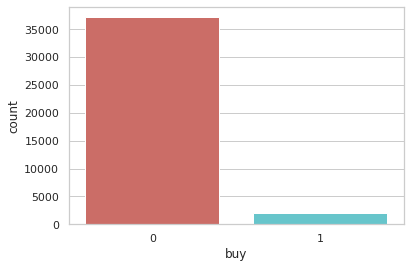

<Figure size 432x288 with 0 Axes>

In [7]:
sns.countplot(x='buy', data =df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [101]:
# df = df.drop(columns=['created_at', 'signup_date'])
df_test = df_test.drop(columns=['created_at', 'signup_date'])

In [102]:
df_test

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,created_at_day,created_at_month,created_at_year,signup_date_day,signup_date_month,signup_date_year
0,39162,2,2,0.0,1,1,0,0,0,1,...,0,0,1,0,1,1,2022,17.0,8.0,2021.0
1,39163,4,7,3.0,1,0,0,0,0,0,...,0,0,0,0,1,1,2022,21.0,5.0,2020.0
2,39164,8,7,0.0,0,0,0,0,1,1,...,0,0,0,0,1,1,2022,16.0,6.0,2021.0
3,39165,9,8,2.0,0,0,0,0,1,1,...,0,0,2,0,1,1,2022,22.0,6.0,2020.0
4,39166,4,5,2.0,1,0,0,0,0,0,...,0,0,0,0,1,1,2022,10.0,3.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,16,12,0.0,0,0,0,0,0,1,...,0,0,0,0,30,3,2022,16.0,6.0,2021.0
13180,52342,12,8,0.0,1,0,0,0,0,1,...,0,0,0,0,30,3,2022,19.0,3.0,2022.0
13181,52343,14,14,3.0,0,0,1,0,0,0,...,0,0,0,0,30,3,2022,15.0,8.0,2021.0
13182,52344,14,10,0.0,0,0,0,0,0,0,...,0,0,1,0,30,3,2022,16.0,6.0,2021.0


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# x = df.iloc[:, :-1]
# y = df.iloc[:, -1]
x = df.iloc[:, df.columns != 'buy']
y = df.iloc[:, df.columns == 'buy']


In [89]:
df_test

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,created_at_day,created_at_month,created_at_year,signup_date_day,signup_date_month,signup_date_year
0,39162,2,2,0.0,1,1,0,0,0,1,...,0,0,1,0,1,1,2022,17,8,2021
1,39163,4,7,3.0,1,0,0,0,0,0,...,0,0,0,0,1,1,2022,21,5,2020
3,39165,9,8,2.0,0,0,0,0,1,1,...,0,0,2,0,1,1,2022,22,6,2020
4,39166,4,5,2.0,1,0,0,0,0,0,...,0,0,0,0,1,1,2022,10,3,2021
6,39168,2,4,1.0,1,0,0,0,0,0,...,0,0,0,0,1,1,2022,8,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,52333,13,10,2.0,0,0,0,0,0,0,...,0,0,1,0,30,3,2022,29,9,2021
13175,52337,14,12,0.0,1,0,0,0,0,1,...,0,0,0,0,30,3,2022,18,3,2020
13176,52338,3,8,1.0,0,0,0,0,0,0,...,0,0,1,0,30,3,2022,12,11,2021
13180,52342,12,8,0.0,1,0,0,0,0,1,...,0,0,0,0,30,3,2022,19,3,2022


In [76]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [77]:
df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_at_day,created_at_month,created_at_year,signup_date_day,signup_date_month,signup_date_year
count,24048.000000,24048.000000,24048.000000,24048.000000,24048.00000,24048.000000,24048.000000,24048.000000,24048.000000,24048.000000,...,24048.000000,24048.000000,24048.000000,24048.000000,24048.000000,24048.000000,24048.0,24048.000000,24048.000000,24048.000000
mean,18679.588781,6.129533,6.116101,1.288714,0.39155,0.010687,0.108242,0.017881,0.161469,0.515677,...,0.000624,0.238357,0.000707,0.082044,16.021873,7.528443,2021.0,15.779233,6.466068,2020.262683
std,11318.514543,3.371913,2.546869,1.216329,0.50675,0.102826,0.310692,0.132521,0.369774,0.564031,...,0.024968,0.453966,0.026579,0.274438,8.798249,3.182691,0.0,8.753769,3.568612,1.107737
min,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2021.0,1.000000,1.000000,2015.000000
25%,8811.750000,3.000000,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,2021.0,8.000000,3.000000,2020.000000
50%,18243.500000,6.000000,6.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,16.000000,8.000000,2021.0,16.000000,7.000000,2020.000000
75%,28347.250000,8.000000,8.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,24.000000,10.000000,2021.0,23.000000,10.000000,2021.000000
max,39161.000000,16.000000,15.000000,4.000000,3.00000,1.000000,1.000000,1.000000,2.000000,3.000000,...,1.000000,4.000000,1.000000,1.000000,31.000000,12.000000,2021.0,31.000000,12.000000,2022.000000


In [103]:
# y_pred = logreg.predict(X_test)
y_pred = logreg.predict(df_test)
y_pred
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
submission = pd.DataFrame({
     "id":list(df_test["id"]),
     "buy":list(y_pred)
     })

submission.to_csv("submission_karthik_v2.csv", 
          index=False)

In [94]:
submission['buy'].value_counts()

0    6463
1      72
Name: buy, dtype: int64

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6597   28]
 [ 402  188]]


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6625
           1       0.87      0.32      0.47       590

    accuracy                           0.94      7215
   macro avg       0.91      0.66      0.72      7215
weighted avg       0.94      0.94      0.93      7215

